### Chain Using LangGraph
In this section we will see how we can build a simple chain using Langgraph that uses 4 important concepts

- How to use chat messages as our graph state
- How to use chat models in graph nodes
- How to bind tools to our LLM in chat models
- How to execute the tools call in our graph nodes 

In [3]:
from dotenv import load_dotenv
import os
load_dotenv()


os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

#### How to use chat messages as our graph state
##### Messages

We can use messages which can be used to capture different roles within a conversation.
LangChain has various message types including HumanMessage, AIMessage, SystemMessage and ToolMessage.
These represent a message from the user, from chat model, for the chat model to instruct behavior, and from a tool call.

Every message have these important components.

- content - content of the message
- name - Specify the name of author
- response_metadata - optionally, a dict of metadata (e.g., often populated by model provider for AIMessages)



In [8]:
from langchain_core.messages import AIMessage, HumanMessage
from pprint import pprint

messages = [AIMessage(content = f"Please tell me how can I help you!", name="LLMModel")]
messages.append(HumanMessage(content=f"I want to learn coding", name="Tejas"))
messages.append(AIMessage(content=f"Which programming language you want to learn", name="LLMModel"))
messages.append(HumanMessage(content=f"I want to learn Python Programming Language", name="Tejas"))

for message in messages:
    message.pretty_print()

================================== Ai Message ==================================
Name: LLMModel

Please tell me how can I help you!
================================ Human Message =================================
Name: Tejas

I want to learn coding
================================== Ai Message ==================================
Name: LLMModel

Which programming language you want to learn
================================ Human Message =================================
Name: Tejas

I want to learn Python Programming Language


### Chat Models

We can use the sequence of message as input with the chatmodels using LLM's and OPENAI.

In [10]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model = "gpt-4o-mini", temperature=0)
response = llm.invoke(messages)
print(response.content)

Great choice! Python is a versatile and beginner-friendly programming language. Here’s a step-by-step guide to help you get started:

### 1. **Set Up Your Environment**
   - **Install Python**: Download and install Python from the [official website](https://www.python.org/downloads/). Make sure to check the box that says "Add Python to PATH" during installation.
   - **Choose an IDE/Text Editor**: You can use any text editor, but popular choices include:
     - **VS Code**: A powerful code editor with many extensions.
     - **PyCharm**: A dedicated Python IDE.
     - **Jupyter Notebook**: Great for data science and interactive coding.

### 2. **Learn the Basics**
   - **Syntax and Data Types**: Understand variables, strings, integers, floats, lists, tuples, and dictionaries.
   - **Control Structures**: Learn about `if` statements, loops (`for`, `while`), and how to control the flow of your program.
   - **Functions**: Learn how to define and call functions, and understand the concept

In [11]:
response.response_metadata

{'token_usage': {'completion_tokens': 618,
  'prompt_tokens': 61,
  'total_tokens': 679,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-mini-2024-07-18',
 'system_fingerprint': 'fp_8bda4d3a2c',
 'id': 'chatcmpl-CD4Abvtfa2uu8RInvCnrgyz44wUBN',
 'service_tier': 'default',
 'finish_reason': 'stop',
 'logprobs': None}

### Tools
Tools can be integrated with the LLM models to interact with external systems. External systems can be API's, third party tools.

Whenever a query is asked the model can choose to call the tool and this query is based on the 
natural language input and this will return an output that matches the tool's schema

In [19]:
def add(a:int,b:int)-> int:
    """ Add a and b
    Args:
        a (int): first int
        b (int): second int

    Returns:
        int
    """
    return a+b

In [13]:
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000019AA4E7F4D0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000019AA492C2C0>, root_client=<openai.OpenAI object at 0x0000019AA3535E80>, root_async_client=<openai.AsyncOpenAI object at 0x0000019AA4E7C590>, model_name='gpt-4o-mini', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********'))

In [24]:
### Binding tool with llm

llm_with_tools=llm.bind_tools([add])

tool_call=llm_with_tools.invoke([HumanMessage(content=f"What is 2 plus 2",name="Krish")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_eOqUfvocC9EJQwzrEMiHIYoh', 'function': {'arguments': '{"a":2,"b":2}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 73, 'total_tokens': 90, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CD4dV7fx9rZdcrWw1dr33U1KdlR4q', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--4b4b57c3-dae4-4a8c-82e7-6a016bcefb76-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 2}, 'id': 'call_eOqUfvocC9EJQwzrEMiHIYoh', 'type': 'tool_call'}], usage_metadata={'input_tokens': 73, 'output_tokens': 17, 'total_tokens': 90, 'input_token_details': {'audio': 0, 'cache_read': 0

In [25]:
tool_call.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'call_1JSXS6xslcmp68k1jShra7BR',
  'type': 'tool_call'}]

### Using messages as state

In [37]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage

class State(TypedDict):
    messages:list[AnyMessage]

#### Reducers
Now, we have a minor problem!

As we discussed, each node will return a new value for our state key messages.

But, this new value will override the prior messages value.

As our graph runs, we want to append messages to our messages state key.

We can use reducer functions to address this.

Reducers allow us to specify how state updates are performed.

If no reducer function is specified, then it is assumed that updates to the key should override it as we saw before.

But, to append messages, we can use the pre-built add_messages reducer.

This ensures that any messages are appended to the existing list of messages.

We simply need to annotate our messages key with the add_messages reducer function as metadata.

In [39]:
from langgraph.graph.message import add_messages
from typing import Annotated
class State(TypedDict):
    messages:Annotated[list[AnyMessage], add_messages]


### Reducer with add_messages

In [40]:
initial_message = [AIMessage(content=f"Please tell me how can I help", name="LLMModel")]
initial_message.append(HumanMessage(content=f"I want to learn coding", name="Tejas"))
initial_message

[AIMessage(content='Please tell me how can I help', additional_kwargs={}, response_metadata={}, name='LLMModel'),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='Tejas')]

In [41]:
ai_message = AIMessage(content=f"Which programming language you want to learn", name="LLMModel")
ai_message

AIMessage(content='Which programming language you want to learn', additional_kwargs={}, response_metadata={}, name='LLMModel')

In [42]:
### Reducers add_messages is to append instead of override
add_messages(initial_message, ai_message)

[AIMessage(content='Please tell me how can I help', additional_kwargs={}, response_metadata={}, name='LLMModel', id='ee1fa6dd-f0e0-437c-8985-0f5234d50bdb'),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='Tejas', id='6d1ab1f1-bb56-4678-bb04-1bbca777980a'),
 AIMessage(content='Which programming language you want to learn', additional_kwargs={}, response_metadata={}, name='LLMModel', id='90aef6f3-7c85-48c6-a0fd-5e1366cd6124')]

In [43]:
##Chat bot node functionality
def llm_tool(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

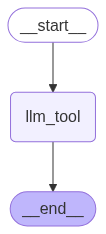

In [44]:
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)

builder.add_node("llm_tool", llm_tool)

builder.add_edge(START, "llm_tool")
builder.add_edge("llm_tool", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [48]:
### invocation 

messages = graph.invoke({"messages":"What is 2 plus 2"})

for message in messages['messages']:
    message.pretty_print()

================================ Human Message =================================

What is 2 plus 2
================================== Ai Message ==================================
Tool Calls:
  add (call_FiFqcyVan02qPQM7ZzqIF34T)
 Call ID: call_FiFqcyVan02qPQM7ZzqIF34T
  Args:
    a: 2
    b: 2
